<a href="https://colab.research.google.com/github/boredColleen/Causation/blob/main/causalnex_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# prompt: pip 최신으로 업그레이드하자

!pip install --upgrade pip


  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [4]:
!pip install causalnex

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 21.2 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.7.1
    Uninstalling traitlets-5.7.1:
      Successfully uninstalled traitlets-5.7.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
  Attempting uni

In [5]:
import warnings
from causalnex.structure import StructureModel

warnings.filterwarnings("ignore")  # silence warnings

sm = StructureModel()

In [6]:

sm.add_edges_from([
    ('health', 'absences'),
    ('health', 'G1')
])

In [7]:

sm.edges

OutEdgeView([('health', 'absences'), ('health', 'G1')])

In [9]:
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

import pandas as pd

data = pd.read_csv('test.csv', delimiter=',')
data.head(5)

,Internal_Film_Thickness,Film_Stiffness,Manufacturer,Curing_Hardness,Pressure,Temperature,Window_Type,UV_Exposure,Display_Size,Module_Thickness,Quality_Score
0,0.50,300,CompanyA,80,150000,25,Type1,150,24.0,1.2,85
1,0.60,350,CompanyB,82,155000,27,Type2,160,24.5,1.3,88
2,0.70,320,CompanyA,78,145000,23,Type1,140,23.0,1.1,80
3,0.55,310,CompanyC,81,148000,26,Type3,155,25.0,1.2,84
4,0.65,330,CompanyB,83,160000,28,Type2,165,24.8,1.4,90


In [10]:
drop_col = ['school','sex','age','Mjob', 'Fjob','reason','guardian']
data = data.drop(columns=drop_col)
data.head(5)

KeyError: "['school', 'sex', 'age', 'Mjob', 'Fjob', 'reason', 'guardian'] not found in axis"

In [11]:
import numpy as np

struct_data = data.copy()
non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)

print(non_numeric_columns)

['Manufacturer', 'Window_Type']


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col])

struct_data.head(5)

,Internal_Film_Thickness,Film_Stiffness,Manufacturer,Curing_Hardness,Pressure,Temperature,Window_Type,UV_Exposure,Display_Size,Module_Thickness,Quality_Score
0,0.50,300,0,80,150000,25,0,150,24.0,1.2,85
1,0.60,350,1,82,155000,27,1,160,24.5,1.3,88
2,0.70,320,0,78,145000,23,0,140,23.0,1.1,80
3,0.55,310,2,81,148000,26,2,155,25.0,1.2,84
4,0.65,330,1,83,160000,28,1,165,24.8,1.4,90


In [13]:
from causalnex.structure.notears import from_pandas
sm = from_pandas(struct_data)

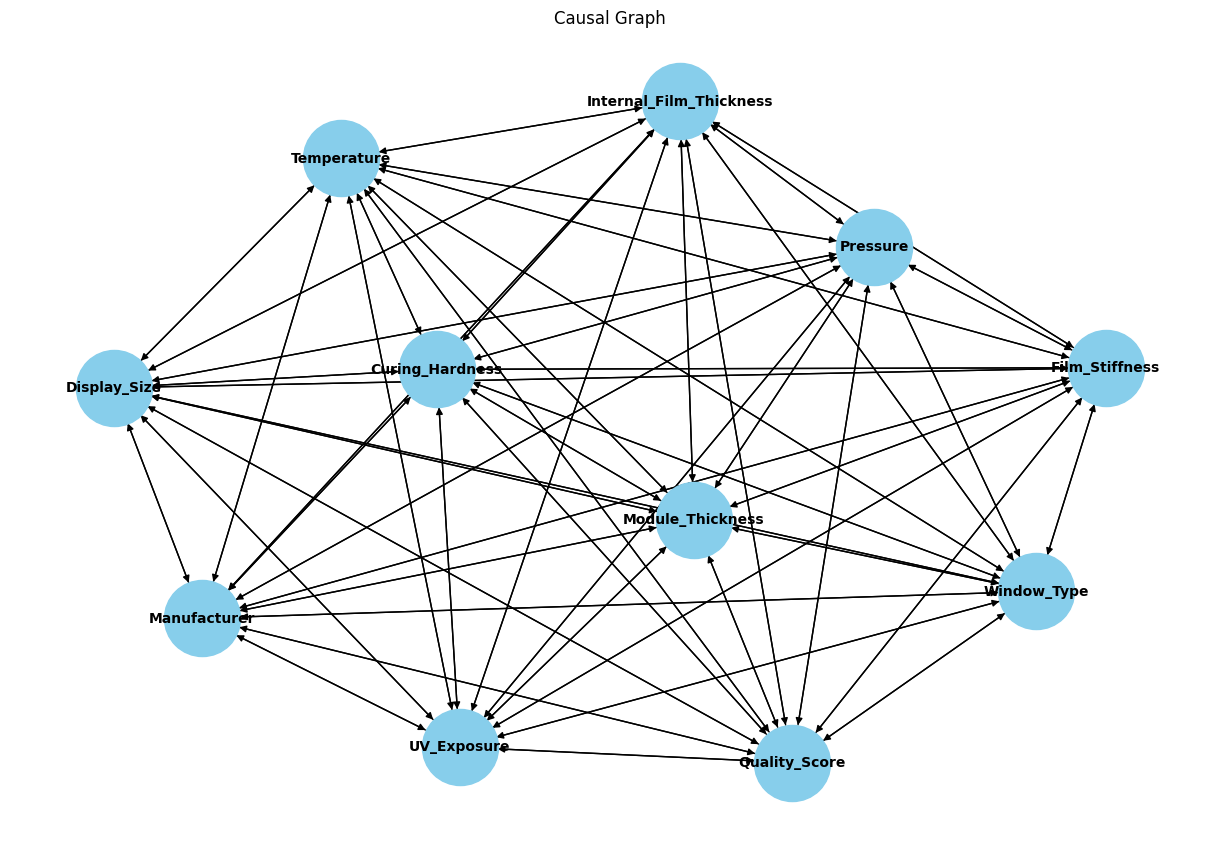

In [14]:
viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)

viz.toggle_physics(False)
#viz.show("01_fully_connected.html")

import matplotlib.pyplot as plt
import networkx as nx


# 그래프 객체 생성
G = nx.DiGraph()

# 노드와 엣지 추가
G.add_nodes_from(sm.nodes)
G.add_edges_from(sm.edges)

# 그래프 그리기
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # 노드 위치를 자동으로 결정
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
plt.title('Causal Graph')
plt.show()


In [18]:
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
#viz.show("supporting_files/01_thresholded.html")

In [19]:
sm = from_pandas(struct_data, tabu_edges=[("higher", "Medu")], w_threshold=0.8)

In [20]:
viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
#viz.show("supporting_files/01_edge_added.html")

In [21]:
sm.add_edge("failures", "G1")
sm.remove_edge("Pstatus", "G1")
sm.remove_edge("address", "G1")

In [22]:
viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
#viz.show("supporting_files/01_modified_structure.html")

In [24]:
sm = sm.get_largest_subgraph()
viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
#viz.show("supporting_files/01_largest_subgraph.html")

In [25]:
sm = sm.get_largest_subgraph()
viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
#viz.show("supporting_files/01_largest_subgraph.html")

In [26]:
import networkx as nx

nx.drawing.nx_pydot.write_dot(sm, 'graph.dot')

In [27]:
from causalnex.network import BayesianNetwork

bn = BayesianNetwork(sm)

In [28]:
discretised_data = data.copy()

data_vals = {col: data[col].unique() for col in data.columns}

failures_map = {v: 'no-failure' if v == [0]
                else 'have-failure' for v in data_vals['failures']}
studytime_map = {v: 'short-studytime' if v in [1,2]
                 else 'long-studytime' for v in data_vals['studytime']}

In [29]:
discretised_data["failures"] = discretised_data["failures"].map(failures_map)
discretised_data["studytime"] = discretised_data["studytime"].map(studytime_map)

In [30]:
from causalnex.discretiser import Discretiser

discretised_data["absences"] = Discretiser(method="fixed",
                          numeric_split_points=[1, 10]).transform(discretised_data["absences"].values)
discretised_data["G1"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["G1"].values)
discretised_data["G2"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["G2"].values)
discretised_data["G3"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["G3"].values)

In [31]:
absences_map = {0: "No-absence", 1: "Low-absence", 2: "High-absence"}

G1_map = {0: "Fail", 1: "Pass"}
G2_map = {0: "Fail", 1: "Pass"}
G3_map = {0: "Fail", 1: "Pass"}

discretised_data["absences"] = discretised_data["absences"].map(absences_map)
discretised_data["G1"] = discretised_data["G1"].map(G1_map)
discretised_data["G2"] = discretised_data["G2"].map(G2_map)
discretised_data["G3"] = discretised_data["G3"].map(G3_map)

In [32]:
# Split 90% train and 10% test
from sklearn.model_selection import train_test_split

train, test = train_test_split(discretised_data, train_size=0.9, test_size=0.1, random_state=7)

In [33]:
bn = bn.fit_node_states(discretised_data)

In [34]:
bn = bn.fit_cpds(train, method="BayesianEstimator", bayes_prior="K2")

In [35]:
bn.cpds["G1"]

failures    have-failure                                                 \
higher                no                                                  
schoolsup             no                            yes                   
studytime long-studytime short-studytime long-studytime short-studytime   
G1                                                                        
Fail                0.75        0.806452            0.5            0.75   
Pass                0.25        0.193548            0.5            0.25   

failures                                                                 \
higher               yes                                                  
schoolsup             no                            yes                   
studytime long-studytime short-studytime long-studytime short-studytime   
G1                                                                        
Fail                 0.5        0.612245            0.5            0.75   
Pass                 0.5        0.387755            0.5            0.25   

failures      no-failure                                                 \
higher                no                                                  
schoolsup             no                            yes                   
studytime long-studytime short-studytime long-studytime short-studytime   
G1                                                                        
Fail                 0.5        0.612903            0.5             0.5   
Pass                 0.5        0.387097            0.5             0.5   

failures                                                                 
higher               yes                                                 
schoolsup             no                            yes                  
studytime long-studytime short-studytime long-studytime short-studytime  
G1                                                                       
Fail            0.032967         0.15016       0.111111        0.255814  
Pass            0.967033         0.84984       0.888889        0.744186

In [36]:
discretised_data.loc[18, discretised_data.columns != 'G1']

address                     U
famsize                   GT3
Pstatus                     T
Medu                        3
Fedu                        2
traveltime                  1
studytime     short-studytime
failures         have-failure
schoolsup                  no
famsup                    yes
paid                      yes
activities                yes
nursery                   yes
higher                    yes
internet                  yes
romantic                   no
famrel                      5
freetime                    5
goout                       5
Dalc                        2
Walc                        4
health                      5
absences          Low-absence
G2                       Fail
G3                       Fail
Name: 18, dtype: object

In [37]:
predictions = bn.predict(discretised_data, "G1")

In [38]:
print(f"The prediction is '{predictions.loc[18, 'G1_prediction']}'")

The prediction is 'Fail'


In [39]:
print(f"The ground truth is '{discretised_data.loc[18, 'G1']}'")

The ground truth is 'Fail'


In [40]:
from causalnex.evaluation import classification_report

classification_report(bn, test, "G1")

{'G1_Fail': {'precision': 0.7777777777777778,
  'recall': 0.5833333333333334,
  'f1-score': 0.6666666666666666,
  'support': 12},
 'G1_Pass': {'precision': 0.9107142857142857,
  'recall': 0.9622641509433962,
  'f1-score': 0.9357798165137615,
  'support': 53},
 'accuracy': 0.8923076923076924,
 'macro avg': {'precision': 0.8442460317460317,
  'recall': 0.7727987421383649,
  'f1-score': 0.8012232415902141,
  'support': 65},
 'weighted avg': {'precision': 0.8861721611721611,
  'recall': 0.8923076923076924,
  'f1-score': 0.8860973888496825,
  'support': 65}}

In [41]:
from causalnex.evaluation import roc_auc
roc, auc = roc_auc(bn, test, "G1")
print(auc)

0.9181065088757396


In [42]:
bn = bn.fit_cpds(discretised_data, method="BayesianEstimator", bayes_prior="K2")

In [43]:
from causalnex.inference import InferenceEngine

ie = InferenceEngine(bn)
marginals = ie.query()
marginals["G1"]

{'Fail': 0.25260687281677224, 'Pass': 0.7473931271832277}

In [44]:
import numpy as np

labels, counts = np.unique(discretised_data["G1"], return_counts=True)
list(zip(labels, counts))

[('Fail', 157), ('Pass', 492)]

In [45]:
marginals_short = ie.query({"studytime": "short-studytime"})
marginals_long = ie.query({"studytime": "long-studytime"})
print("Marginal G1 | Short Studtyime", marginals_short["G1"])
print("Marginal G1 | Long Studytime", marginals_long["G1"])

Marginal G1 | Short Studtyime {'Fail': 0.2776556433482524, 'Pass': 0.7223443566517477}
Marginal G1 | Long Studytime {'Fail': 0.15504850337837614, 'Pass': 0.8449514966216239}


In [46]:
print("distribution before do", ie.query()["higher"])
ie.do_intervention("higher",
                   {'yes': 1.0,
                    'no': 0.0})
print("distribution after do", ie.query()["higher"])

distribution before do {'no': 0.10752688172043011, 'yes': 0.8924731182795698}
distribution after do {'no': 0.0, 'yes': 0.9999999999999998}


In [47]:
ie.reset_do("higher")

In [48]:
print("marginal G1", ie.query()["G1"])
ie.do_intervention("higher",
                   {'yes': 1.0,
                    'no': 0.0})
print("updated marginal G1", ie.query()["G1"])

marginal G1 {'Fail': 0.25260687281677224, 'Pass': 0.7473931271832277}
updated marginal G1 {'Fail': 0.20682952942551894, 'Pass': 0.7931704705744809}


In [49]:
nodes = sm.nodes()
edges = sm.edges()

print("Nodes:", nodes)
print("Edges:", edges)

Nodes: ['address', 'Pstatus', 'studytime', 'failures', 'schoolsup', 'paid', 'higher', 'internet', 'famrel', 'absences', 'G1', 'G2', 'G3']
Edges: [('address', 'absences'), ('Pstatus', 'famrel'), ('Pstatus', 'absences'), ('studytime', 'G1'), ('failures', 'absences'), ('failures', 'G1'), ('schoolsup', 'G1'), ('paid', 'absences'), ('higher', 'famrel'), ('higher', 'G1'), ('internet', 'absences'), ('G1', 'G2'), ('G2', 'G3')]


In [50]:
sm.edges

OutEdgeView([('address', 'absences'), ('Pstatus', 'famrel'), ('Pstatus', 'absences'), ('studytime', 'G1'), ('failures', 'absences'), ('failures', 'G1'), ('schoolsup', 'G1'), ('paid', 'absences'), ('higher', 'famrel'), ('higher', 'G1'), ('internet', 'absences'), ('G1', 'G2'), ('G2', 'G3')])

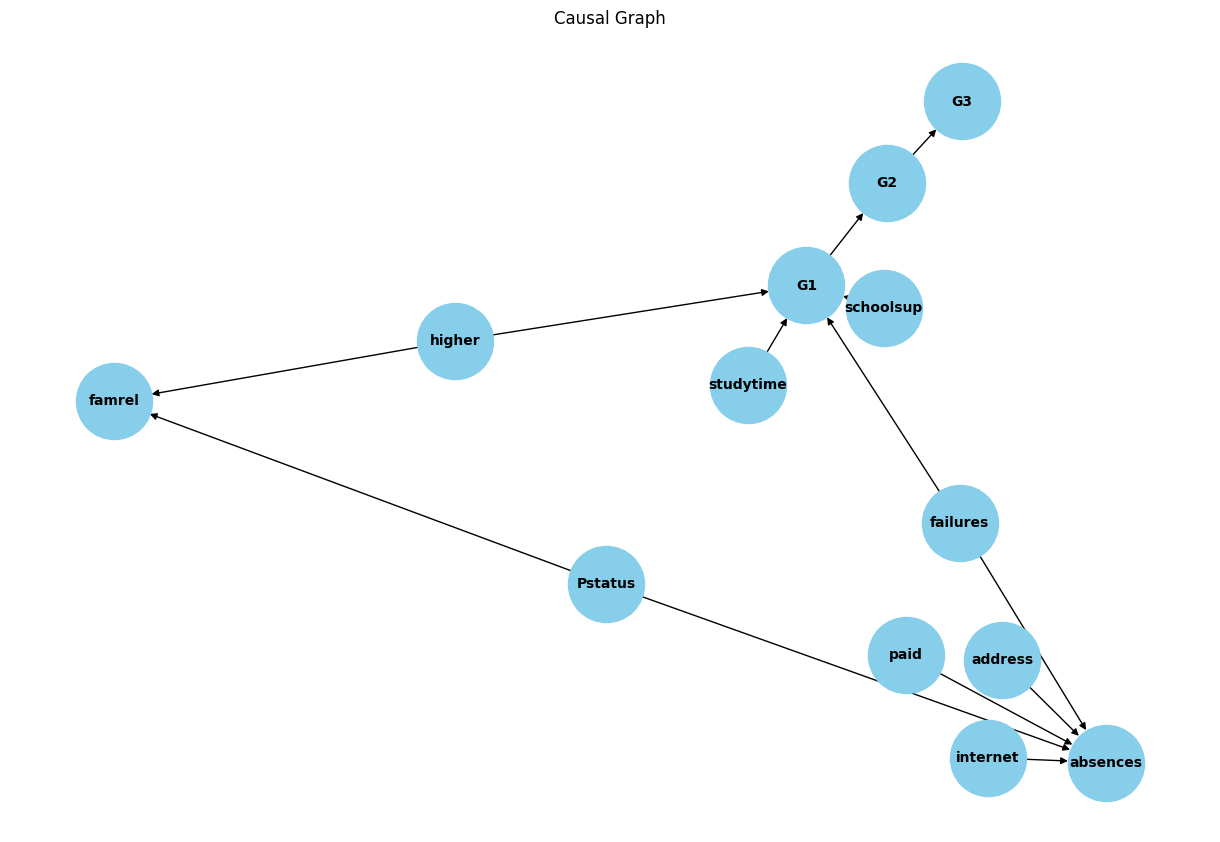

In [51]:
import matplotlib.pyplot as plt
import networkx as nx

# 노드와 엣지 정의
nodes = ['address', 'Pstatus', 'studytime', 'failures', 'schoolsup', 'paid', 'higher', 'internet', 'famrel', 'absences', 'G1', 'G2', 'G3']
edges = [('address', 'absences'), ('Pstatus', 'famrel'), ('Pstatus', 'absences'), ('studytime', 'G1'),
         ('failures', 'absences'), ('failures', 'G1'), ('schoolsup', 'G1'), ('paid', 'absences'),
         ('higher', 'famrel'), ('higher', 'G1'), ('internet', 'absences'), ('G1', 'G2'), ('G2', 'G3')]

# 그래프 객체 생성
G = nx.DiGraph()

# 노드와 엣지 추가
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# 그래프 그리기
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # 노드 위치를 자동으로 결정
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
plt.title('Causal Graph')
plt.show()
